In [1026]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import threading
import time

In [1027]:
with open('busy_day.in') as file:
    data = file.read().splitlines()

In [1028]:
data

['400 600 30 112993 200',
 '400',
 '73 40 84 107 52 36 13 74 36 94 93 46 123 24 100 93 62 49 97 102 80 37 22 25 72 48 40 74 32 31 136 64 99 37 44 36 104 74 112 40 65 67 50 143 23 26 91 20 142 128 9 77 40 26 55 104 59 112 42 69 87 89 2 11 105 43 105 23 21 88 57 40 52 63 35 141 54 27 45 37 21 37 102 38 36 117 57 93 24 52 83 133 51 102 34 52 39 54 64 146 127 100 58 50 49 40 55 123 64 30 127 63 19 59 31 22 68 37 107 68 52 61 35 38 76 44 21 144 21 40 105 48 97 70 74 95 75 28 25 40 81 72 58 99 52 5 72 84 53 21 110 97 30 43 92 109 39 89 51 30 102 94 13 45 93 94 90 104 36 55 92 12 45 126 73 132 118 127 125 26 83 69 49 39 4 63 84 47 75 43 82 43 51 28 118 110 42 2 53 74 54 57 92 23 72 95 76 35 38 100 52 34 58 74 86 25 32 61 39 55 76 68 107 82 97 108 57 38 88 71 22 40 63 37 80 51 52 52 67 101 49 46 100 52 63 36 53 45 51 56 71 50 13 29 18 36 87 86 39 11 148 74 74 121 11 28 65 79 32 85 95 26 43 123 81 78 25 100 27 90 53 60 100 25 72 80 83 40 62 53 40 97 105 56 49 100 36 46 80 8 23 58 78 58 24 78 67

In [1029]:
def Convert(string): 
    l = list(string.split(" ")) 
    return l
def IntConvert(string):
    l = list(string.split(" "))
    for i in range(len(l)):
        l[i] = int(l[i])
    return l
line1 = Convert(data[0])
print('Grid Dimensions: ', line1[0], 'x', line1[1],
      '\n Number of Drones: ', line1[2],
      '\n Turns: ', line1[3],
      '\n Max Payload: ', line1[4])
print('\n Number of Product Types:',data[1],
      '\n Product Weights:',data[2],
      '\n Number of Warehouses:',data[3])

#Product Weights
products = Convert(data[2])
wh_products_all = []
    
warehouse_list = list(range(int(data[3])))
wh_coord = []
step = 0
for i in range(4,2*int(data[3])+3,2):
    print('\n Warehouse #', warehouse_list[step]+1 ,'Location (Row Column):', data[i],
          '\n Warehouse #', warehouse_list[step]+1 ,'Inventory: ', data[i+1])
    wh_coord.append(data[i])
    wh_products_all.append(data[i+1])
    step += 1

Grid Dimensions:  400 x 600 
 Number of Drones:  30 
 Turns:  112993 
 Max Payload:  200

 Number of Product Types: 400 
 Product Weights: 73 40 84 107 52 36 13 74 36 94 93 46 123 24 100 93 62 49 97 102 80 37 22 25 72 48 40 74 32 31 136 64 99 37 44 36 104 74 112 40 65 67 50 143 23 26 91 20 142 128 9 77 40 26 55 104 59 112 42 69 87 89 2 11 105 43 105 23 21 88 57 40 52 63 35 141 54 27 45 37 21 37 102 38 36 117 57 93 24 52 83 133 51 102 34 52 39 54 64 146 127 100 58 50 49 40 55 123 64 30 127 63 19 59 31 22 68 37 107 68 52 61 35 38 76 44 21 144 21 40 105 48 97 70 74 95 75 28 25 40 81 72 58 99 52 5 72 84 53 21 110 97 30 43 92 109 39 89 51 30 102 94 13 45 93 94 90 104 36 55 92 12 45 126 73 132 118 127 125 26 83 69 49 39 4 63 84 47 75 43 82 43 51 28 118 110 42 2 53 74 54 57 92 23 72 95 76 35 38 100 52 34 58 74 86 25 32 61 39 55 76 68 107 82 97 108 57 38 88 71 22 40 63 37 80 51 52 52 67 101 49 46 100 52 63 36 53 45 51 56 71 50 13 29 18 36 87 86 39 11 148 74 74 121 11 28 65 79 32 85 95 26 43 12

In [1030]:
num_orders = data[2*int(data[3])+4]
print('\n')
print('Number of Orders: ', num_orders)

orders_list = list(range(int(num_orders)))
ord_coord = []
num_prod_ord = []
step = 0
num = 6
for i in range(4,2*int(data[3])+3):
    num += 1
for i in range(2*int(data[3])+5, num+int(num_orders)*3,3):
    print('Order located at ', data[i],
          'Items in Order ', data[i+2])
    ord_coord.append(data[i])
    num_prod_ord.append(int(data[i+1]))



Number of Orders:  1250
Order located at  340 371 Items in Order  226 183 6 220 299 280 12 42
Order located at  163 320 Items in Order  163
Order located at  201 331 Items in Order  192 81
Order located at  257 290 Items in Order  270 305 111 37 219 111 96 290 377 113
Order located at  115 512 Items in Order  169 146 397 263 342 275 18 26
Order located at  154 147 Items in Order  372 165 338 43
Order located at  188 326 Items in Order  55 398 299 392 179 215
Order located at  210 180 Items in Order  49 76 205 364 55 388 219
Order located at  92 216 Items in Order  41 26 16
Order located at  135 190 Items in Order  385 243 184 83 289
Order located at  254 201 Items in Order  300 272 298 367 10 121
Order located at  198 328 Items in Order  230
Order located at  193 254 Items in Order  35 53 86 71 347 172 130 54 127 204 30 281
Order located at  259 211 Items in Order  66 26 200 398 355 375 296
Order located at  211 211 Items in Order  17 111 66 189 214 75 287 130 228 225 344 388 223
Ord

Order located at  193 341 Items in Order  20 293 1 220 7 391
Order located at  104 383 Items in Order  362 188 99 346 216 158 288 158 278 275 242 14 35
Order located at  130 180 Items in Order  222 287 110 300 369 154 86
Order located at  199 345 Items in Order  172
Order located at  177 252 Items in Order  196 222 373 88 162 399 124 57 361 256 338 75 201 229 350 243 99 161
Order located at  181 346 Items in Order  104 136 2 259 226 81 188 11 296 352 375
Order located at  329 236 Items in Order  244 262 142 32
Order located at  138 253 Items in Order  273 166 40
Order located at  221 297 Items in Order  286 177 104 26 39 384 52
Order located at  264 214 Items in Order  261 210 17 150 116 293 299 34
Order located at  378 340 Items in Order  201 73 96 1
Order located at  337 225 Items in Order  278 220 356 109 304
Order located at  160 249 Items in Order  204 122 168 278
Order located at  175 338 Items in Order  125 278 338 50 269 12
Order located at  123 407 Items in Order  247 191 105 

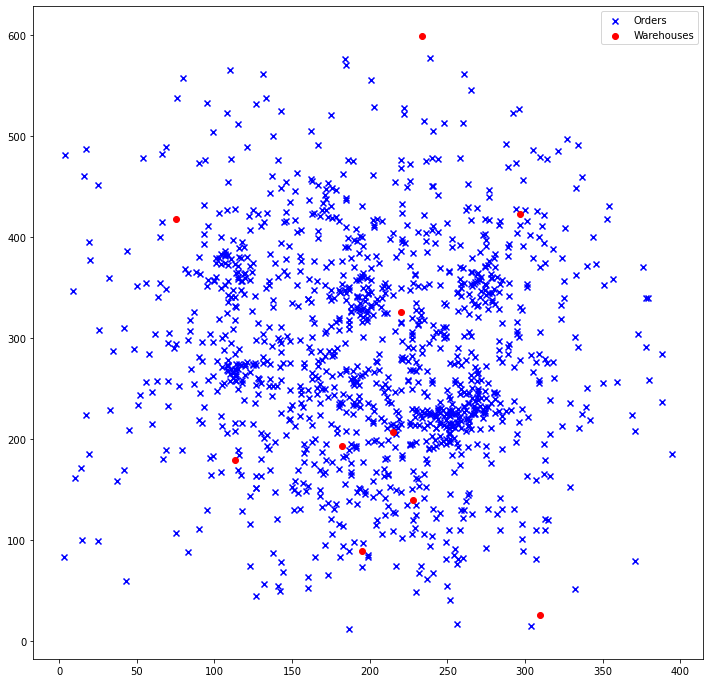

In [1031]:
l_wh_coord = []
for i in range(len(wh_coord)):
    l_wh_coord.append(Convert(wh_coord[i]))
wh_x_coord = []
wh_y_coord = []
for i in range(len(l_wh_coord)):
    wh_x_coord.append(int(l_wh_coord[i][0]))
    wh_y_coord.append(int(l_wh_coord[i][1]))
    
l_or_coord = []
for i in range(len(ord_coord)):
    l_or_coord.append(Convert(ord_coord[i]))
    
ord_x_coord = []
ord_y_coord = []
for i in range(len(l_or_coord)):
    ord_x_coord.append(int(l_or_coord[i][0]))
    ord_y_coord.append(int(l_or_coord[i][1]))
    
plt.figure(figsize=(12,12))
plt.scatter(ord_x_coord, ord_y_coord, color='b', marker="x", label = 'Orders')
plt.scatter(wh_x_coord, wh_y_coord, color='r', marker="o", label = 'Warehouses')
plt.legend()
plt.show()

# Algorithm

In [1032]:
class Drone():
    def __init__(self, name):
        self.name = name
        self.item = [0] * int(data[1])
        self.location = IntConvert(data[4])
    def load(self, item, wh_num):
        global warehouse
        global order
        self.item[item] += order.count(str(item))
        warehouse[wh_num].inventory[item] -= 1
    def unload(self):
        self.item = [0] * int(data[1])
    def move(self, x, y):
        self.location = [x,y]

In [1033]:
class Warehouse():
    def __init__(self, name):
        self.name = name
        self.inventory = IntConvert(data[5+(2*int(name))])
        self.location = IntConvert(data[4+(2*int(name))])

In [1034]:
num_drones = int(line1[2])
num_drones

30

In [1035]:
num_drones = int(line1[2])
num_drones

30

In [1036]:
num_warehouses = int(data[3])
num_warehouses

10

In [1037]:
drone = []
for i in range(num_drones):
    drone.append(Drone(str(i)))

In [1038]:
warehouse = []
for i in range(num_warehouses):
    warehouse.append(Warehouse(str(i)))

In [1039]:
drone[0].location

[113, 179]

In [1040]:
warehouse[0].location

[113, 179]

In [1041]:
order_line = 2*int(data[3])+7
warehouse_0 = Convert(data[4])
order_loc = Convert(data[order_line-2])
order = Convert(data[order_line])
num_orders = data[2*int(data[3])+4]

In [1042]:
orders_filled = 0
commands = []
order_line = 2*int(data[3])+7
tot_turns = 0
counter = 0

In [1043]:
def Algorithm(Drone_1):
    global orders_filled
    global commands
    global order_line
    global orders_filled
    global tot_turns
    global counter
    while orders_filled < int(num_orders):
        order = Convert(data[order_line])
        order_loc = Convert(data[order_line-2])
        order_line += 3
        order_count = 0
        for o in order:
            for i in range(len(warehouse)):
                if warehouse[i].inventory[int(o)] > 0:
                    tot_turns += math.ceil(((abs(int(warehouse[i].location[0])-Drone_1.location[0]))**2 + 
                                 (abs(int(warehouse[i].location[1])-Drone_1.location[1])**2))**0.5)
                    Drone_1.move(int(warehouse[i].location[0]), int(warehouse[i].location[1]))
                    if Drone_1.item[int(o)] == 0:
                        Drone_1.load(int(o), i)
                    tot_turns += 1
                    commands.append([Drone_1.name,'L', str(i), order[order_count], '1'])
                    order_count += 1
                    break
        tot_turns += math.ceil(((abs(int(order_loc[0])-Drone_1.location[0]))**2 + 
                                (abs(int(order_loc[1])-Drone_1.location[1])**2))**0.5)
        Drone_1.move(int(order_loc[0]), int(order_loc[1]))
        for i in range(len(Drone_1.item)):
            if Drone_1.item[i] > 0:
                commands.append([Drone_1.name,'D', str(orders_filled), str(i), str(Drone_1.item[i])])
                tot_turns += 1
                counter += 1
        Drone_1.unload()
        orders_filled += 1
        time.sleep(0.001)

In [1044]:
def one():
    Algorithm(drone[0])
def two():
    Algorithm(drone[1])
def three():
    Algorithm(drone[2])
def four():
    Algorithm(drone[4])
def five():
    Algorithm(drone[5])
def six():
    Algorithm(drone[6])
def seven():
    Algorithm(drone[7])
def eight():
    Algorithm(drone[8])
def nine():
    Algorithm(drone[9])
def ten():
    Algorithm(drone[10])
def eleven():
    Algorithm(drone[11])
def twelve():
    Algorithm(drone[12])
def thirteen():
    Algorithm(drone[13])
def fourteen():
    Algorithm(drone[14])
def fifteen():
    Algorithm(drone[15])
def sixteen():
    Algorithm(drone[16])
def seventeen():
    Algorithm(drone[17])
def eighteen():
    Algorithm(drone[18])
def nineteen():
    Algorithm(drone[19])
def twenty():
    Algorithm(drone[20])
def twentyone():
    Algorithm(drone[21])
def twentytwo():
    Algorithm(drone[22])
def twentythree():
    Algorithm(drone[23])
def twentyfour():
    Algorithm(drone[24])
def twentyfive():
    Algorithm(drone[25])
def twentysix():
    Algorithm(drone[26])
def twentyseven():
    Algorithm(drone[27])
def twentyeight():
    Algorithm(drone[28])
def twentynine():
    Algorithm(drone[29])

In [1045]:
runlist = [one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twentyone, twentytwo, twentythree, twentyfour, twentyfive, twentysix, twentyseven, twentyeight, twentynine]

for i in runlist:
    threading.Thread(target=i).start()

In [1046]:
orders_filled

620

In [1047]:
tot_turns

2009288

In [1048]:
print(len(commands))
for i in range(len(commands)):
    print(*commands[i], sep=' ')

9560
0 L 4 226 1
0 L 5 183 1
0 L 3 6 1
0 L 7 220 1
0 L 0 299 1
0 L 0 280 1
0 L 9 12 1
0 L 0 42 1
0 D 0 6 1
0 D 0 12 1
0 D 0 42 1
0 D 0 183 1
0 D 0 220 1
0 D 0 226 1
0 D 0 280 1
0 D 0 299 1
1 L 0 163 1
2 L 1 192 1
2 L 0 81 1
4 L 0 270 1
4 L 6 305 1
4 L 0 111 1
4 L 0 37 1
4 L 0 219 1
4 L 0 111 1
4 L 0 96 1
4 L 0 290 1
4 L 0 377 1
4 L 5 113 1
5 L 0 169 1
5 L 0 146 1
5 L 0 397 1
5 L 0 263 1
5 L 0 342 1
5 L 0 275 1
5 L 3 18 1
5 L 0 26 1
6 L 3 372 1
6 L 8 165 1
6 L 1 338 1
6 L 0 43 1
7 L 2 55 1
7 L 0 398 1
7 L 0 299 1
7 L 7 392 1
7 L 0 179 1
7 L 0 215 1
7 D 6 299 1
1 L 2 49 1
1 L 0 76 1
1 L 0 205 1
1 L 5 364 1
1 L 2 55 1
1 L 2 388 1
1 L 0 219 1
0 L 8 41 1
0 L 0 26 1
0 L 0 16 1
2 L 0 385 1
2 L 0 243 1
2 L 5 184 1
2 L 0 83 1
2 L 7 289 1
8 L 0 300 1
8 L 0 272 1
8 L 8 298 1
8 L 8 367 1
8 L 0 10 1
8 L 3 121 1
9 L 0 230 1
10 L 0 35 1
10 L 6 53 1
10 L 4 86 1
10 L 5 71 1
10 L 0 347 1
10 L 0 172 1
10 L 8 130 1
10 L 1 54 1
10 L 0 127 1
10 L 0 204 1
10 L 2 30 1
10 L 0 281 1
7 L 8 66 1
7 L 0 26 1
7 L 2 

1 L 0 100 1
1 L 6 53 1
1 L 0 359 1
1 L 0 360 1
1 L 0 216 1
1 L 0 373 1
0 L 0 277 1
0 L 1 95 1
0 L 8 312 1
0 L 9 337 1
0 L 1 43 1
0 L 0 26 1
0 L 8 279 1
0 L 0 65 1
0 L 8 130 1
0 L 0 229 1
0 L 9 379 1
7 L 0 16 1
7 L 9 303 1
7 L 6 399 1
7 L 5 71 1
7 L 6 365 1
7 L 1 391 1
7 L 0 368 1
7 L 0 329 1
7 L 1 173 1
7 L 0 127 1
7 L 0 164 1
7 L 2 254 1
7 L 0 182 1
7 L 0 227 1
7 L 6 399 1
7 L 8 298 1
7 L 1 338 1
13 L 4 226 1
13 L 9 256 1
13 L 6 335 1
13 L 8 161 1
13 L 6 399 1
13 L 0 377 1
13 L 9 128 1
13 L 1 370 1
13 D 104 226 1
20 L 0 127 1
20 L 4 394 1
20 L 1 349 1
20 L 1 227 1
20 L 9 69 1
20 L 2 340 1
20 L 0 45 1
20 L 0 383 1
20 L 1 314 1
20 L 0 138 1
20 L 1 377 1
20 L 0 348 1
2 L 0 323 1
2 L 2 146 1
2 L 1 3 1
2 L 0 2 1
2 L 6 142 1
2 L 0 371 1
2 L 0 35 1
2 L 5 23 1
8 L 0 181 1
8 L 2 319 1
8 L 9 235 1
8 L 2 388 1
8 L 0 237 1
8 L 1 198 1
8 L 0 73 1
8 L 0 299 1
8 L 0 17 1
8 L 1 314 1
8 L 0 219 1
8 L 1 60 1
8 L 1 375 1
8 L 1 42 1
8 L 6 174 1
8 D 107 42 1
8 D 107 299 1
24 L 5 395 1
24 L 0 214 1
24 L 1 

20 L 0 239 1
20 L 9 256 1
20 L 5 344 1
20 L 1 383 1
20 L 9 25 1
20 L 3 121 1
20 L 0 239 1
20 L 6 53 1
20 L 2 30 1
20 L 0 373 1
11 L 1 189 1
11 L 0 218 1
11 L 1 363 1
11 L 8 367 1
11 L 2 302 1
11 L 6 335 1
11 L 1 268 1
11 L 6 107 1
11 L 1 32 1
11 L 5 71 1
11 L 8 307 1
11 L 8 324 1
11 L 0 61 1
11 L 2 382 1
11 L 8 67 1
11 L 6 335 1
11 L 2 138 1
7 L 1 24 1
7 L 1 268 1
7 L 1 112 1
7 L 3 36 1
7 L 2 55 1
7 L 3 80 1
7 L 0 247 1
7 L 0 396 1
7 L 7 145 1
7 L 3 228 1
4 L 1 104 1
4 L 2 384 1
4 L 8 279 1
4 L 7 68 1
4 L 2 383 1
4 L 7 332 1
4 L 1 202 1
4 L 0 396 1
14 L 1 214 1
14 L 7 332 1
9 L 1 104 1
9 L 2 158 1
9 L 0 290 1
9 L 8 130 1
9 L 8 130 1
9 L 0 168 1
9 L 2 248 1
9 L 0 109 1
9 L 1 350 1
9 L 1 356 1
29 L 1 189 1
29 L 3 264 1
29 L 6 238 1
29 L 2 388 1
29 L 8 355 1
29 L 7 145 1
29 L 0 398 1
27 L 1 287 1
27 L 4 155 1
27 L 0 40 1
5 L 0 378 1
5 L 2 342 1
5 L 0 205 1
5 L 1 270 1
5 L 0 100 1
5 L 1 293 1
5 L 1 10 1
8 L 8 257 1
8 L 5 244 1
8 L 2 60 1
8 L 0 247 1
8 L 6 142 1
24 L 0 35 1
24 L 3 27 1
24 L

26 L 2 132 1
9 L 0 269 1
9 L 3 255 1
10 L 2 201 1
10 L 0 188 1
10 L 1 104 1
10 L 2 284 1
10 L 1 397 1
10 L 7 145 1
10 L 0 326 1
10 L 1 172 1
0 L 1 397 1
0 L 5 364 1
0 L 1 149 1
0 L 1 300 1
0 L 1 54 1
0 L 0 299 1
0 L 1 301 1
0 L 1 70 1
0 L 9 29 1
0 L 8 66 1
0 L 2 45 1
0 D 320 299 1
1 L 4 155 1
1 L 1 278 1
1 L 3 224 1
1 L 0 252 1
22 L 3 243 1
22 L 1 211 1
22 L 1 111 1
22 L 2 32 1
22 L 1 390 1
22 L 1 54 1
22 L 4 352 1
22 L 2 61 1
27 L 2 214 1
27 L 2 26 1
27 L 2 384 1
27 L 1 106 1
14 L 0 76 1
14 L 8 66 1
14 L 1 278 1
14 L 1 65 1
8 L 8 125 1
24 L 1 208 1
24 L 3 153 1
24 L 5 286 1
24 L 0 252 1
24 L 6 195 1
24 L 1 136 1
17 L 7 93 1
17 L 5 244 1
17 L 0 325 1
12 L 2 375 1
12 L 1 301 1
12 L 1 167 1
12 L 5 71 1
23 L 1 99 1
23 L 0 194 1
23 L 8 355 1
23 L 1 397 1
23 L 0 276 1
23 L 3 13 1
23 L 3 192 1
23 L 8 324 1
23 L 2 241 1
23 L 2 241 1
23 L 0 110 1
6 L 9 251 1
6 L 9 251 1
6 L 0 396 1
6 L 1 219 1
6 L 0 385 1
6 L 2 129 1
6 L 1 17 1
6 L 6 399 1
6 L 0 64 1
6 L 8 130 1
21 L 2 50 1
21 L 1 299 1
21 L 1

23 L 0 373 1
6 L 2 167 1
6 L 5 286 1
6 L 1 104 1
6 L 2 202 1
6 L 8 41 1
6 L 4 313 1
6 L 3 47 1
6 L 3 360 1
16 L 8 41 1
16 L 3 159 1
16 L 5 184 1
16 L 8 315 1
16 L 5 212 1
16 L 2 262 1
16 L 7 145 1
29 L 1 299 1
29 L 1 28 1
29 L 3 360 1
29 L 2 384 1
29 L 2 164 1
29 L 3 153 1
29 L 0 168 1
29 D 434 299 1
25 L 2 297 1
25 L 2 284 1
25 L 6 335 1
25 L 3 382 1
25 L 2 163 1
25 L 0 73 1
25 L 1 390 1
25 L 3 201 1
25 L 1 120 1
25 L 9 386 1
25 L 2 122 1
25 L 8 131 1
10 L 1 110 1
10 L 1 120 1
10 L 2 173 1
10 L 1 151 1
10 L 4 156 1
10 L 2 297 1
10 L 5 71 1
10 L 1 120 1
10 L 3 382 1
10 L 1 370 1
10 L 8 267 1
10 L 6 238 1
10 L 1 211 1
10 L 2 16 1
21 L 6 362 1
21 L 1 278 1
21 L 6 365 1
21 L 0 325 1
21 L 1 396 1
21 L 5 357 1
21 L 3 350 1
21 L 4 185 1
21 L 1 172 1
9 L 2 55 1
9 L 2 361 1
9 L 9 116 1
9 L 5 71 1
9 L 2 133 1
9 L 1 52 1
9 L 1 147 1
9 L 3 345 1
9 L 6 107 1
9 L 2 119 1
7 L 2 225 1
7 L 2 225 1
7 L 3 36 1
7 L 2 384 1
0 L 2 63 1
0 L 2 38 1
0 L 1 197 1
0 L 2 57 1
0 L 3 60 1
0 L 2 384 1
0 L 2 323 1
27

24 L 1 396 1
24 L 7 289 1
24 L 3 241 1
24 L 2 7 1
24 L 1 349 1
24 L 4 76 1
24 L 9 69 1
28 L 4 223 1
28 L 3 361 1
28 L 9 58 1
28 L 5 286 1
28 L 4 342 1
28 L 2 191 1
28 L 2 55 1
28 L 6 362 1
12 L 2 115 1
12 L 1 287 1
12 L 1 74 1
12 L 7 220 1
12 L 0 249 1
12 D 534 220 1
23 L 3 18 1
23 L 2 127 1
23 L 2 167 1
23 L 6 174 1
23 L 3 46 1
23 L 3 132 1
23 L 2 259 1
23 L 8 355 1
23 L 1 278 1
23 L 5 286 1
23 L 2 199 1
25 L 1 349 1
25 L 3 57 1
25 L 3 18 1
25 L 2 166 1
25 L 7 220 1
25 L 2 110 1
25 L 3 26 1
25 L 0 179 1
25 L 3 61 1
25 L 3 159 1
25 L 5 212 1
25 L 2 151 1
25 L 3 228 1
25 L 3 62 1
25 L 8 367 1
25 L 2 216 1
25 D 536 220 1
8 L 3 75 1
8 L 2 172 1
8 L 3 63 1
8 L 3 346 1
8 L 3 241 1
8 L 2 278 1
8 L 6 365 1
8 L 4 314 1
8 L 5 40 1
18 L 6 335 1
18 L 8 312 1
18 L 3 350 1
18 L 1 377 1
18 L 9 160 1
18 L 1 171 1
18 L 3 366 1
18 L 2 88 1
18 L 4 139 1
18 L 5 339 1
18 L 7 108 1
18 L 3 270 1
15 L 2 266 1
15 L 0 168 1
15 L 0 92 1
15 L 1 54 1
15 L 6 365 1
15 L 3 136 1
15 L 4 226 1
15 D 539 226 1
1 L 3 35 

14 L 2 301 1
14 L 2 193 1
14 L 3 159 1
23 L 2 278 1
23 L 4 16 1
23 L 5 314 1
23 L 2 377 1
23 L 8 312 1
19 L 5 395 1
19 L 3 375 1
19 L 2 104 1
19 L 1 370 1
19 L 0 296 1
19 L 2 49 1
19 L 5 85 1
19 L 8 165 1
19 L 1 81 1
19 L 8 161 1
19 L 2 319 1
19 L 1 54 1
19 L 1 39 1
19 L 3 239 1
19 L 4 78 1
19 L 8 257 1
16 L 3 199 1
16 L 7 68 1
16 L 3 94 1
16 L 4 169 1
16 L 3 127 1
16 L 8 257 1
16 L 4 185 1
16 L 9 14 1
16 L 9 128 1
16 L 4 189 1
16 L 7 97 1
16 L 8 315 1
16 L 2 245 1
5 L 4 323 1
5 L 4 155 1
5 L 1 188 1
5 L 2 327 1
5 L 3 35 1
5 L 3 191 1
13 L 3 178 1
13 L 3 132 1
13 L 9 116 1
13 L 4 2 1
13 L 3 301 1
13 L 4 270 1
13 L 6 362 1
13 L 2 197 1
13 L 6 51 1
13 L 2 237 1
22 L 3 300 1
22 L 3 346 1
25 L 3 100 1
25 L 3 80 1
25 L 2 215 1
25 L 1 356 1
25 L 3 233 1
25 L 3 299 1
25 L 8 66 1
25 L 2 215 1
25 L 6 95 1
25 L 2 222 1
25 L 1 52 1
25 L 4 221 1
25 L 2 30 1
25 L 3 129 1
25 L 2 30 1
25 L 2 64 1
25 D 653 299 1
21 L 2 260 1
21 L 3 243 1
21 L 9 251 1
21 L 3 159 1
21 L 3 127 1
21 L 7 19 1
21 L 2 111 1


9 L 3 346 1
9 L 8 257 1
9 L 0 157 1
9 L 4 348 1
9 L 3 227 1
9 L 3 81 1
9 L 3 114 1
9 L 4 63 1
9 L 3 227 1
9 L 5 230 1
4 L 3 372 1
4 L 3 328 1
4 L 3 114 1
4 L 5 62 1
4 L 8 66 1
4 L 8 130 1
16 L 1 211 1
16 L 4 214 1
16 L 2 384 1
16 L 4 101 1
16 L 3 99 1
16 L 7 68 1
16 L 2 74 1
16 L 0 247 1
14 L 9 369 1
14 L 3 390 1
14 L 2 302 1
14 L 0 72 1
14 L 5 286 1
14 L 3 186 1
14 L 9 386 1
14 L 4 342 1
14 L 4 78 1
14 L 3 216 1
14 L 3 159 1
10 L 5 360 1
10 L 3 83 1
10 L 3 127 1
10 L 7 220 1
10 L 3 233 1
10 L 3 229 1
10 L 8 161 1
10 L 5 239 1
10 D 767 220 1
5 L 0 168 1
5 L 5 322 1
20 L 4 127 1
20 L 2 334 1
20 L 2 154 1
20 L 4 35 1
20 L 9 58 1
20 L 4 126 1
20 L 3 18 1
20 L 7 392 1
20 L 2 56 1
20 L 9 337 1
20 L 7 145 1
20 L 3 114 1
20 L 5 241 1
20 L 0 296 1
12 L 9 303 1
12 L 0 272 1
12 L 4 96 1
12 L 3 81 1
12 L 0 179 1
12 L 4 270 1
12 L 3 114 1
15 L 4 155 1
15 L 6 8 1
15 L 3 233 1
15 L 4 270 1
15 L 3 27 1
15 L 6 362 1
15 L 2 104 1
15 L 3 311 1
15 L 4 297 1
15 L 5 85 1
8 L 8 267 1
8 L 8 41 1
8 L 4 214 1


5 L 0 168 1
5 L 5 60 1
5 L 5 196 1
5 L 2 319 1
5 L 5 189 1
5 L 2 193 1
5 L 0 168 1
5 L 6 255 1
5 L 5 24 1
5 L 7 19 1
22 L 3 233 1
22 L 4 352 1
22 L 4 114 1
15 L 1 338 1
15 L 4 218 1
15 L 8 355 1
15 L 7 97 1
15 L 5 26 1
15 L 5 364 1
15 L 8 66 1
15 L 5 390 1
15 L 5 286 1
15 L 3 153 1
15 L 5 360 1
15 L 4 45 1
15 L 0 272 1
15 L 5 71 1
15 L 1 370 1
2 L 5 376 1
2 L 3 228 1
7 L 9 14 1
7 L 3 233 1
7 L 5 376 1
0 L 6 255 1
16 L 4 347 1
16 L 9 14 1
16 L 6 238 1
16 L 4 201 1
16 L 5 339 1
16 L 2 310 1
16 L 4 149 1
16 L 8 165 1
16 L 4 253 1
16 L 5 348 1
16 L 4 175 1
16 L 9 303 1
16 L 6 217 1
16 L 3 290 1
16 L 7 289 1
4 L 5 241 1
4 L 0 182 1
4 L 6 107 1
4 L 8 41 1
9 L 6 85 1
9 L 6 365 1
29 L 6 107 1
29 L 5 288 1
29 L 2 252 1
29 L 1 261 1
29 L 5 241 1
25 L 5 243 1
25 L 9 337 1
25 L 8 161 1
25 L 4 104 1
23 L 4 86 1
23 L 5 133 1
11 L 2 188 1
11 L 6 383 1
11 L 5 61 1
11 L 4 204 1
11 L 5 342 1
11 L 0 272 1
11 L 8 267 1
11 L 7 108 1
18 L 4 70 1
18 L 4 262 1
18 L 3 290 1
18 L 4 260 1
18 L 5 133 1
18 L 3 163

19 L 5 184 1
1 L 4 127 1
1 L 8 165 1
1 L 8 355 1
1 L 5 201 1
1 L 5 395 1
1 L 2 302 1
1 L 7 19 1
1 L 4 297 1
1 L 4 114 1
1 L 4 345 1
0 L 4 242 1
0 L 4 203 1
0 L 6 396 1
0 L 5 328 1
0 L 4 216 1
0 L 7 332 1
0 L 5 275 1
26 L 4 273 1
26 L 0 31 1
26 L 0 157 1
26 L 3 153 1
26 L 5 184 1
26 L 3 233 1
26 L 4 154 1
26 L 2 358 1
26 L 4 88 1
26 L 5 119 1
26 L 4 10 1
26 L 0 272 1
26 L 4 46 1
26 L 9 303 1
26 L 5 301 1
26 L 5 26 1
26 L 2 30 1
9 L 5 35 1
9 L 8 66 1
9 L 5 63 1
9 L 5 183 1
9 L 9 235 1
9 L 2 7 1
9 L 4 164 1
9 L 8 324 1
9 L 5 26 1
9 L 1 389 1
9 L 4 57 1
9 L 5 361 1
9 L 4 208 1
9 L 3 74 1
9 D 986 183 1
16 L 6 181 1
16 L 8 148 1
16 L 7 383 1
16 L 3 27 1
16 L 1 147 1
14 L 6 174 1
14 L 4 203 1
14 L 6 209 1
14 L 6 326 1
14 L 5 154 1
14 L 2 388 1
14 L 9 235 1
14 L 5 154 1
14 L 6 122 1
14 L 4 164 1
14 L 5 50 1
14 L 8 66 1
14 L 6 365 1
27 L 3 290 1
27 L 4 375 1
5 L 4 375 1
5 L 7 98 1
5 L 5 154 1
5 L 4 287 1
5 L 4 104 1
12 L 9 58 1
12 L 4 32 1
12 L 4 229 1
12 L 4 127 1
12 L 6 107 1
12 L 1 349 1
12 

15 L 5 96 1
15 D 1096 220 1
17 L 5 216 1
17 L 6 48 1
17 L 7 320 1
17 L 8 161 1
28 L 9 303 1
28 L 9 263 1
12 L 5 270 1
12 L 4 252 1
12 L 6 330 1
12 L 5 99 1
12 L 1 28 1
12 L 8 355 1
12 L 8 307 1
24 L 6 126 1
24 L 2 236 1
24 L 6 350 1
23 L 4 323 1
23 L 8 315 1
23 L 5 190 1
23 L 5 164 1
23 L 0 157 1
23 L 7 392 1
23 L 1 261 1
23 L 6 362 1
23 L 4 139 1
23 L 8 267 1
23 L 5 37 1
0 L 7 97 1
0 L 6 362 1
0 L 3 121 1
0 L 2 49 1
0 L 8 66 1
0 L 5 278 1
0 L 4 317 1
0 L 0 276 1
0 L 5 323 1
0 L 5 45 1
6 L 5 154 1
19 L 9 14 1
19 L 7 108 1
19 L 7 336 1
19 L 8 355 1
19 L 5 278 1
19 L 3 341 1
19 L 5 196 1
19 L 3 153 1
19 L 6 201 1
19 L 3 159 1
19 L 6 90 1
19 L 0 179 1
19 L 7 392 1
19 L 6 149 1
19 L 4 273 1
5 L 5 344 1
5 L 2 334 1
5 L 3 282 1
5 L 6 167 1
5 L 6 115 1
5 L 5 132 1
5 L 4 78 1
1 L 5 188 1
1 L 8 41 1
1 L 6 398 1
1 L 6 119 1
1 L 6 210 1
1 L 2 302 1
1 L 8 41 1
1 L 5 301 1
1 L 2 124 1
1 L 5 375 1
1 L 5 221 1
1 L 9 265 1
1 L 7 289 1
1 L 8 312 1
1 L 7 175 1
1 L 7 68 1
20 L 7 396 1
20 L 4 236 1
20 L 5

17 L 4 180 1
17 L 8 181 1
23 L 9 12 1
23 L 7 314 1
23 L 9 116 1
23 L 7 19 1
23 L 3 80 1
23 L 2 55 1
23 L 9 209 1
23 L 6 362 1
23 D 1221 12 1
7 L 7 392 1
7 L 5 64 1
18 L 6 206 1
18 L 2 384 1
18 L 8 367 1
18 L 4 290 1
18 L 3 264 1
18 L 7 347 1
18 L 2 49 1
12 L 7 392 1
12 L 9 353 1
12 L 4 236 1
12 L 1 171 1
12 L 2 334 1
12 L 7 145 1
12 L 6 63 1
12 L 2 284 1
12 L 3 380 1
26 L 6 221 1
26 L 6 199 1
26 L 9 251 1
26 L 8 126 1
2 L 3 233 1
2 L 6 278 1
2 L 0 269 1
2 L 2 49 1
2 L 6 75 1
29 L 9 337 1
29 L 8 66 1
29 L 5 237 1
29 L 0 373 1
29 L 5 152 1
29 L 2 309 1
29 L 9 265 1
29 L 6 154 1
29 L 1 370 1
1 L 9 29 1
1 L 7 223 1
1 L 2 222 1
1 L 7 350 1
1 L 6 278 1
1 L 2 358 1
1 L 8 324 1
1 L 6 70 1
1 L 2 30 1
1 L 7 61 1
11 L 5 184 1
11 L 8 41 1
27 L 5 114 1
27 L 5 245 1
27 L 9 386 1
27 L 5 299 1
27 L 7 253 1
27 D 1230 299 1
28 L 7 108 1
28 L 5 57 1
28 L 7 220 1
28 L 4 287 1
28 L 5 325 1
28 L 0 31 1
28 L 7 169 1
28 L 6 142 1
28 L 5 113 1
28 D 1231 220 1
19 L 5 127 1
19 L 6 133 1
19 L 7 189 1
19 L 7 97 1


In [1049]:
counter

192